# Automação de Pipeline e Coleta de Dados de Criptoativos com Python.

In [ ]:
# Dataset: Dados extraídos em tempo real pelo site CoinMarketCap API.
# Objetivo: Automação da coleta e visualização de indicadores de mercado das top 15 criptomoedas via API.

In [ ]:
# Passo a Passo da Automação:

# 1- Conexão com API: Autenticação e requisição de dados estruturados (JSON).

# 2- Extração (ETL): Conversão de dados brutos para DataFrames e normalização de estruturas aninhadas.

# 3- Automação e Armazenamento: Agendamento de coleta contínua e persistência de dados em um arquivo CSV.

# 4- Limpeza e Tratamento: Padronização de strings e organização dos formatos de dados.

# 5- Visualização de Dados: Geração de gráficos para análise de variações e comportamento dos preços.

In [ ]:
#1- Conexão com API:
#Conectando ao site e coletando dados.
#Ocorre a configuração da sessão e das credenciais para acessar os dados em tempo real do CoinMarketCap.          
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [5]:
# 2- Extração (ETL): 
import pandas as pd

# Visualização de todas as colunas e linhas.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Organiza os dados em formato de tabela(DataFrame).
df = pd.json_normalize(data['data'])
# Criação uma coluna com o dia e a hora da coleta.
df['timestamp'] = pd.to_datetime('now')

In [6]:
def api_runner():
    #Executa o fluxo principal de coleta: consome a API do CoinMarketCap, trata os dados em um DataFrame e os envia a um arquivo CSV local.
    
    global df
    #Definindo uma função global.
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {'start':'1','limit':'15','convert':'USD'}
    headers = {'Accepts': 'application/json','X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509'}

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Normaliza os dados dentro da variável df2.
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df2

    # Criando um arquivo CSV se não existe ou anexa novos dados(append).
    import os
    if not os.path.isfile(r'C:\Users\sasah\OneDrive\Anexos\API.csv'):
        df.to_csv(r'C:\Users\sasah\OneDrive\Anexos\API.csv', header= 'columns_names')
    else:
         df.to_csv(r'C:\Users\sasah\OneDrive\Anexos\API.csv', mode = 'a', header= False, index=False)
        

In [7]:
# 3- Automação e Armazenamento:
# Monitoramento Contínuo: Coleta de dados a cada 2 segundos.
import os 
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(2) 

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [15]:
df72 = pd.read_csv(r'C:\Users\sasah\OneDrive\Anexos\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12535,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.998266e+07,19982656.0,False,1.549128e+12,NaN,1.000000e+00,NaN,NaN,NaN,2026-02-01T22:40:00.000Z,7.752363e+04,4.984082e+10,-26.932900,0.619519,-0.700497,-10.198391,-14.023994,-17.150821,-2.709095e+01,1.549128e+12,5.948340e+01,1.627996e+12,NaN,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
1,1,1027,Ethereum,ETH,ethereum,11497,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206938e+08,120693814.87947601,True,2.806038e+11,NaN,2.000000e+00,NaN,NaN,NaN,2026-02-01T22:40:00.000Z,2.324923e+03,3.787228e+10,-17.610800,0.392883,-3.683692,-16.683756,-25.744034,-26.601052,-3.517636e+01,2.806038e+11,1.076410e+01,2.806038e+11,NaN,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
2,2,825,Tether USDt,USDT,tether,169464,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.853731e+11,189482994631.04517,True,1.892667e+11,NaN,3.000000e+00,NaN,NaN,NaN,2026-02-01T22:40:00.000Z,9.988586e-01,1.105384e+11,-24.446300,-0.031868,-0.008586,-0.024793,-0.079271,-0.133316,-1.090955e-01,1.851615e+11,7.109800e+00,1.892667e+11,NaN,2026-02-01T22:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-01 19:42:39.030843
3,3,1839,BNB,BNB,bnb,3117,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363600e+08,1.363600e+08,136360007.27,False,1.039936e+11,NaN,4.000000e+00,NaN,NaN,NaN,2026-02-01T22:41:00.000Z,7.626403e+02,2.421627e+09,-24.112500,0.828334,-1.442815,-11.416910,-13.627110,-16.744173,-2.271575e+01,1.039936e+11,3.989300e+00,1.039936e+11,NaN,2026-02-01T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
4,4,52,XRP,XRP,xrp,1791,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.085323e+10,99985724371.0,False,1.607513e+11,NaN,5.000000e+00,NaN,NaN,NaN,2026-02-01T22:40:00.000Z,1.607742e+00,3.834133e+09,-36.450700,0.832561,-0.027722,-11.689579,-20.242793,-26.959462,-2.980595e+01,9.783630e+10,3.753100e+00,1.607742e+11,NaN,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
5,5,3408,USDC,USDC,usd-coin,37042,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.030361e+10,70303612625.83496,False,7.027699e+10,NaN,6.000000e+00,6.090122e+10,6.087816e+10,NaN,2026-02-01T22:40:00.000Z,9.996213e-01,1.269726e+10,-30.318800,-0.012698,-0.018178,-0.005016,-0.028433,-0.024262,-6.149568e-02,7.027699e+10,2.695900e+00,7.027699e+10,NaN,2026-02-01T22:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-01 19:42:39.030843
6,6,5426,Solana,SOL,solana,1082,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.663082e+08,619447463.1394541,True,6.325084e+10,NaN,7.000000e+00,5.252369e+08,5.363114e+10,NaN,2026-02-01T22:41:00.000Z,1.021085e+02,5.125299e+09,-44.531400,0.820661,-1.583148,-13.710101,-23.029186,-29.089895,-3.815093e+01,5.782486e+10,2.218200e+00,6.325084e+10,NaN,2026-02-01T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
7,7,1958,TRON,TRX,tron,1289,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.471806e

In [7]:
print(f"Total de registros capturados: {len(df)}")
df

Total de registros capturados: 90


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12535,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.998266e+07,1.998266e+07,False,1.549128e+12,NaN,1,NaN,NaN,None,2026-02-01T22:40:00.000Z,77523.632947,4.984082e+10,-26.9329,0.619519,-0.700497,-10.198391,-14.023994,-17.150821,-27.090952,1.549128e+12,59.4834,1.627996e+12,None,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
1,1027,Ethereum,ETH,ethereum,11497,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206938e+08,1.206938e+08,True,2.806038e+11,NaN,2,NaN,NaN,None,2026-02-01T22:40:00.000Z,2324.922612,3.787228e+10,-17.6108,0.392883,-3.683692,-16.683756,-25.744034,-26.601052,-35.176362,2.806038e+11,10.7641,2.806038e+11,None,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
2,825,Tether USDt,USDT,tether,169464,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.853731e+11,1.894830e+11,True,1.892667e+11,NaN,3,NaN,NaN,None,2026-02-01T22:40:00.000Z,0.998859,1.105384e+11,-24.4463,-0.031868,-0.008586,-0.024793,-0.079271,-0.133316,-0.109096,1.851615e+11,7.1098,1.892667e+11,None,2026-02-01T22:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-01 19:42:39.030843
3,1839,BNB,BNB,bnb,3117,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363600e+08,1.363600e+08,1.363600e+08,False,1.039936e+11,NaN,4,NaN,NaN,None,2026-02-01T22:41:00.000Z,762.640266,2.421627e+09,-24.1125,0.828334,-1.442815,-11.416910,-13.627110,-16.744173,-22.715752,1.039936e+11,3.9893,1.039936e+11,None,2026-02-01T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
4,52,XRP,XRP,xrp,1791,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.085323e+10,9.998572e+10,False,1.607513e+11,NaN,5,NaN,NaN,None,2026-02-01T22:40:00.000Z,1.607742,3.834133e+09,-36.4507,0.832561,-0.027722,-11.689579,-20.242793,-26.959462,-29.805955,9.783630e+10,3.7531,1.607742e+11,None,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
5,3408,USDC,USDC,usd-coin,37042,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.030361e+10,7.030361e+10,False,7.027699e+10,NaN,6,6.090122e+10,6.087816e+10,None,2026-02-01T22:40:00.000Z,0.999621,1.269726e+10,-30.3188,-0.012698,-0.018178,-0.005016,-0.028433,-0.024262,-0.061496,7.027699e+10,2.6959,7.027699e+10,None,2026-02-01T22:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-01 19:42:39.030843
6,5426,Solana,SOL,solana,1082,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.663082e+08,6.194475e+08,True,6.325084e+10,NaN,7,5.252369e+08,5.363114e+10,None,2026-02-01T22:41:00.000Z,102.108476,5.125299e+09,-44.5314,0.820661,-1.583148,-13.710101,-23.029186,-29.089895,-38.150928,5.782486e+10,2.2182,6.325084e+10,None,2026-02-01T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
7,1958,TRON,TRX,tron,1289,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.471806e+10,9.471805e+10,True,2.698586e+10,NaN,8,9.466789e+10,2.697157e+10,None,2026-02-01T22:41:00.000Z,0.284907,6.816458e+08,-22.9037,0.060910,-0.202884,-3.354637,-1.012019,1.559398,1.047373,2.698587e+10,1.0352,

In [22]:
# Mudança do modelo de notação científica.
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12535,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19982656.00000,19982656.00000,False,1549128089050.70996,NaN,1,NaN,NaN,None,2026-02-01T22:40:00.000Z,77523.63295,49840824653.53625,-26.93290,0.61952,-0.70050,-10.19839,-14.02399,-17.15082,-27.09095,1549128089050.71484,59.48340,1627996291887.58008,None,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
1,1027,Ethereum,ETH,ethereum,11497,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120693814.87948,120693814.87948,True,280603779352.41998,NaN,2,NaN,NaN,None,2026-02-01T22:40:00.000Z,2324.92261,37872275814.10711,-17.61080,0.39288,-3.68369,-16.68376,-25.74403,-26.60105,-35.17636,280603779352.41888,10.76410,280603779352.41998,None,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
2,825,Tether USDt,USDT,tether,169464,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,185373050610.50174,189482994631.04517,True,189266722390.82001,NaN,3,NaN,NaN,None,2026-02-01T22:40:00.000Z,0.99886,110538373160.46063,-24.44630,-0.03187,-0.00859,-0.02479,-0.07927,-0.13332,-0.10910,185161469381.21588,7.10980,189266722390.82001,None,2026-02-01T22:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-01 19:42:39.030843
3,1839,BNB,BNB,bnb,3117,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136360008.15000,136360007.27000,136360007.27000,False,103993632269.72000,NaN,4,NaN,NaN,None,2026-02-01T22:41:00.000Z,762.64027,2421627425.65975,-24.11250,0.82833,-1.44282,-11.41691,-13.62711,-16.74417,-22.71575,103993632269.71719,3.98930,103993632940.84000,None,2026-02-01T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
4,52,XRP,XRP,xrp,1791,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60853233336.00000,99985724371.00000,False,160751251220.17999,NaN,5,NaN,NaN,None,2026-02-01T22:40:00.000Z,1.60774,3834133101.25312,-36.45070,0.83256,-0.02772,-11.68958,-20.24279,-26.95946,-29.80595,97836300742.87677,3.75310,160774202748.89001,None,2026-02-01T22:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
5,3408,USDC,USDC,usd-coin,37042,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,70303612625.83496,70303612625.83496,False,70276987838.06000,NaN,6,60901219650.23000,60878155656.96148,None,2026-02-01T22:40:00.000Z,0.99962,12697262011.87659,-30.31880,-0.01270,-0.01818,-0.00502,-0.02843,-0.02426,-0.06150,70276987838.06113,2.69590,70276987838.06000,None,2026-02-01T22:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-01 19:42:39.030843
6,5426,Solana,SOL,solana,1082,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,566308177.37410,619447463.13945,True,63250836411.39000,NaN,7,525236893.30000,53631138703.79519,None,2026-02-01T22:41:00.000Z,102.10848,5125298971.09022,-44.53140,0.82066,-1.58315,-13.71010,-23.02919,-29.08989,-38.15093,57824864927.17902,2.21820,63250836411.39000,None,2026-02-01T22:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-01 19:42:39.030843
7,1958,TRON,TRX,tron,1289,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,947

In [28]:
#Agrupamento pelo nome da criptomoeda e cálculo da média para as colunas de variação percentual.
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.42496,-0.83256,-10.45600,-14.23326,-17.37878,-27.24282
Ethereum,0.16863,-3.82294,-17.04325,-26.00274,-26.87071,-35.31183
Tether USDt,-0.01756,0.01402,-0.01265,-0.07612,-0.13817,-0.08257
BNB,0.79115,-1.45671,-11.45779,-13.66126,-16.74551,-22.74551
XRP,0.76869,-0.06686,-11.79846,-20.25563,-26.97194,-29.96999
USDC,-0.01622,0.00190,-0.01797,-0.03137,-0.02442,-0.01572
Solana,0.74439,-1.59702,-13.75900,-23.10299,-29.11935,-38.21677
TRON,0.05051,-0.25353,-3.38298,-1.01619,1.54914,1.07331
Dogecoin,0.71599,2.90995,-11.70196,-27.04161,-30.91502,-36.60539


In [35]:
#Empilha as colunas de mudança de porcentagem para criar uma lista única de valores. 
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.42496
              quote.USD.percent_change_24h    -0.83256
              quote.USD.percent_change_7d    -10.45600
              quote.USD.percent_change_30d   -14.23326
              quote.USD.percent_change_60d   -17.37878
              quote.USD.percent_change_90d   -27.24282
Ethereum      quote.USD.percent_change_1h      0.16863
              quote.USD.percent_change_24h    -3.82294
              quote.USD.percent_change_7d    -17.04325
              quote.USD.percent_change_30d   -26.00274
              quote.USD.percent_change_60d   -26.87071
              quote.USD.percent_change_90d   -35.31183
Tether USDt   quote.USD.percent_change_1h     -0.01756
              quote.USD.percent_change_24h     0.01402
              quote.USD.percent_change_7d     -0.01265
              quote.USD.percent_change_30d    -0.07612
              quote.USD.percent_change_60d    -0.13817
              quote.US

In [36]:
type(df4)

pandas.core.series.Series

In [37]:
# Conversão dos dados estruturados para um DataFrame e definição do nome da coluna de valores.
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.42496
             quote.USD.percent_change_24h  -0.83256
             quote.USD.percent_change_7d  -10.45600
             quote.USD.percent_change_30d -14.23326
             quote.USD.percent_change_60d -17.37878
             quote.USD.percent_change_90d -27.24282
Ethereum     quote.USD.percent_change_1h    0.16863
             quote.USD.percent_change_24h  -3.82294
             quote.USD.percent_change_7d  -17.04325
             quote.USD.percent_change_30d -26.00274
             quote.USD.percent_change_60d -26.87071
             quote.USD.percent_change_90d -35.31183
Tether USDt  quote.USD.percent_change_1h   -0.01756
             quote.USD.percent_change_24h   0.01402
             quote.USD.percent_change_7d   -0.01265
             quote.USD.percent_change_30d  -0.07612
             quote.USD.percent_change_60d  -0.13817
             quote.USD.percent_change_90d  -0.08257
BNB          quote.USD.percent_change_1h    0.79115
             quote.USD.percent_change_24h  -1.45671
             quote.USD.percent_change_7d  -11.45779
             quote.USD.percent_change_30d -13.66126
             quote.USD.percent_change_60d -16.74551
             quote.USD.percent_change_90d -22.74551
XRP          quote.USD.percent_change_1h    0.76869
             quote.USD.percent_change_24h  -0.06686
             quote.USD.percent_change_7d  -11.79846
             quote.USD.percent_change_30d -20.25563
             quote.USD.percent_change_60d -26.97194
             quote.USD.percent_change_90d -29.96999
USDC         quote.USD.percent_change_1h   -0.01622
             quote.USD.percent_change_24h   0.00190
             quote.USD.percent_change_7d   -0.01797
             quote.USD.percent_change_30d  -0.03137
             quote.USD.percent_change_60d  -0.02442
             quote.USD.percent_change_90d  -0.01572
Solana       quote.USD.percent_change_1h    0.74439
             quote.USD.percent_change_24h  -1.59702
             quote.USD.percent_change_7d  -13.75900
             quote.USD.percent_change_30d -23.10299
             quote.USD.percent_change_60d -29.11935
             quote.USD.percent_change_90d -38.21677
TRON         quote.USD.percent_change_1h    0.05051
             quote.USD.percent_change_24h  -0.25353
             quote.USD.percent_change_7d   -3.38298
             quote.USD.percent_change_30d  -1.01619
             quote.USD.percent_change_60d   1.54914
             quote.USD.percent_change_90d   1.07331
Dogecoin     quote.USD.percent_change_1h    0.71599
             quote.USD.percent_change_24h   2.90995
             quote.USD.percent_change_7d  -11.70196
             quote.USD.percent_change_30d -27.04161
             quote.USD.percent_change_60d -30.91502
             quote.USD.percent_change_90d -36.60539
Bitcoin Cash quote.USD.percent_change_1h    0.99276
             quote.USD.percent_change_24h   6.83741
             quote.USD.percent_change_7d   -7.81796
             quote.USD.percent_change_30d -13.45388
             quote.USD.percent_change_60d -12.49935
             quote.USD.percent_change_90d   3.85103
Cardano      quote.USD.percent_change_1h    0.60089
             quote.USD.percent_change_24h   0.31222
             quote.USD.percent_change_7d  -14.37667
             quote.USD.percent_change_30d -26.49806
             quote.USD.percent_change_60d -35.80079
             quote.USD.percent_change_90d -47.24387
Hyperliquid  quote.USD.percent_change_1h    2.12545
             quote.USD.percent_change_24h   0.20024
             quote.USD.percent_change_7d   38.00381
             quote.USD.percent_change_30d  23.23904
             quote.USD.percent_change_60d -12.95145
             quote.USD.percent_change_90d -23.91629
UNUS SED LEO quote.USD.percent_change_1h    0.47402
             quote.USD.percent_change_24h  -6.10441
             quote.USD.percent_change_7d   -7.41735
             quote.USD.percent_change_30d

In [40]:
df5.count()

values    90
dtype: int64

In [45]:
#4- Limpeza e Tratamento:
# Resetando o índice para transformar o índice atual em uma coluna comum.
# Isso organiza os dados sequencialmente (0, 1, 2) antes da limpeza final.
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.42496
1,Bitcoin,quote.USD.percent_change_24h,-0.83256
2,Bitcoin,quote.USD.percent_change_7d,-10.45600
3,Bitcoin,quote.USD.percent_change_30d,-14.23326
4,Bitcoin,quote.USD.percent_change_60d,-17.37878
5,Bitcoin,quote.USD.percent_change_90d,-27.24282
6,Ethereum,quote.USD.percent_change_1h,0.16863
7,Ethereum,quote.USD.percent_change_24h,-3.82294
8,Ethereum,quote.USD.percent_change_7d,-17.04325
9,Ethereum,quote.USD.percent_change_30d,-26.00274


In [47]:
# Renomeação das colunas para identificação dos indicadores de variação percentual.
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.42496
1,Bitcoin,quote.USD.percent_change_24h,-0.83256
2,Bitcoin,quote.USD.percent_change_7d,-10.45600
3,Bitcoin,quote.USD.percent_change_30d,-14.23326
4,Bitcoin,quote.USD.percent_change_60d,-17.37878
5,Bitcoin,quote.USD.percent_change_90d,-27.24282
6,Ethereum,quote.USD.percent_change_1h,0.16863
7,Ethereum,quote.USD.percent_change_24h,-3.82294
8,Ethereum,quote.USD.percent_change_7d,-17.04325
9,Ethereum,quote.USD.percent_change_30d,-26.00274


In [52]:
# Padroização de nomes de colunas e limpeza de strings. 
# Substituição de nomes complexos por mais simples (1h, 24h, 7d).
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.42496
1,Bitcoin,24h,-0.83256
2,Bitcoin,7d,-10.45600
3,Bitcoin,30d,-14.23326
4,Bitcoin,60d,-17.37878
5,Bitcoin,90d,-27.24282
6,Ethereum,1h,0.16863
7,Ethereum,24h,-3.82294
8,Ethereum,7d,-17.04325
9,Ethereum,30d,-26.00274


In [48]:
import seaborn as snsimport seaborn as sns
import matplotlib.pyplot as plt

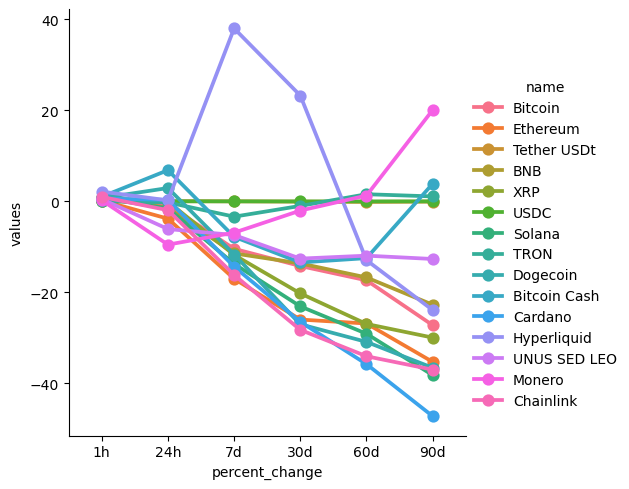

In [53]:
# Gráfico de tendências: Comparando a variação das Top 15 criptomoedas em diferentes variações de tempo.
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [55]:
# Seleção de colunas e filtragem dos dados para a criptomoeda Bitcoin.
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,77523.63295,2026-02-01 19:42:39.030843
0,Bitcoin,77331.70990,2026-02-01 19:44:28.776521
0,Bitcoin,77331.70990,2026-02-01 19:44:32.449065
0,Bitcoin,77331.70990,2026-02-01 19:44:35.887773
0,Bitcoin,77331.70990,2026-02-01 19:44:39.313378
0,Bitcoin,77331.70990,2026-02-01 19:44:42.754586


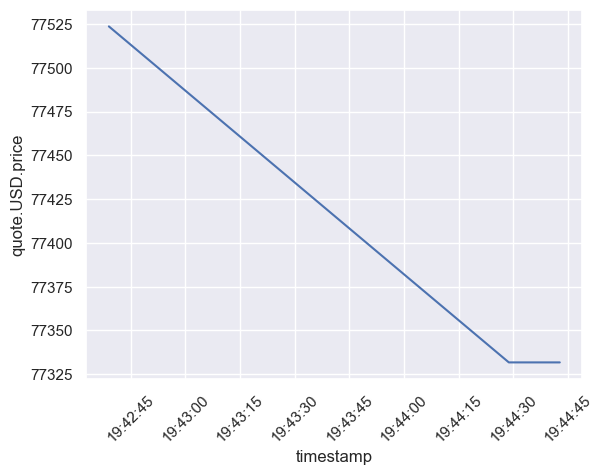

In [62]:
# Configuração variação temporal: Formatando o eixo X para exibir o horário (H:M:S).
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="darkgrid")

ax = sns.lineplot(x='timestamp', y='quote.USD.price', data = df10 )

# Formatação do eixo X para exibir horas, minutos e segundos.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotaciona as legendas para evitar sobreposição.
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Conclusão e Habilidades Aplicadas:

# Consumo de API Rest: Implementação de requisições autenticadas com tratamento de exceções (Timeout, ConnectionError).

# Pipeline de ETL (Extrair, Transformar, Carga): Automação do fluxo desde a extração (JSON) até o carregamento em arquivo físico (CSV).

# Manipulação de Dados: Uso avançado de Pandas para padronização de estruturas aninhadas e agregação de dados.

# Automação: Criação de um agendador (scheduler) em Python para monitoramento de mercado em alta frequência.